In [1]:
#Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Data Pre-processing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

#Model Training and Validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, classification_report, plot_confusion_matrix

#ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

In [2]:
#Loading the dataset
df = pd.read_excel('covid19_clinical_dataset.xlsx')
df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Lets Check the shape of the dataset
df.shape

(5644, 111)

In [4]:
#Lets Check the coulumns name
df.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

In [5]:
#lets chcek the datatypes
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

In [6]:
#Lets Check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [7]:
#lets check the null vales without usig visualisation
df.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

Reamrk:- 
    1. Datset veru huge and null value in many features more than 5000.
    2. So drop all the columns when null value is more than 5000.

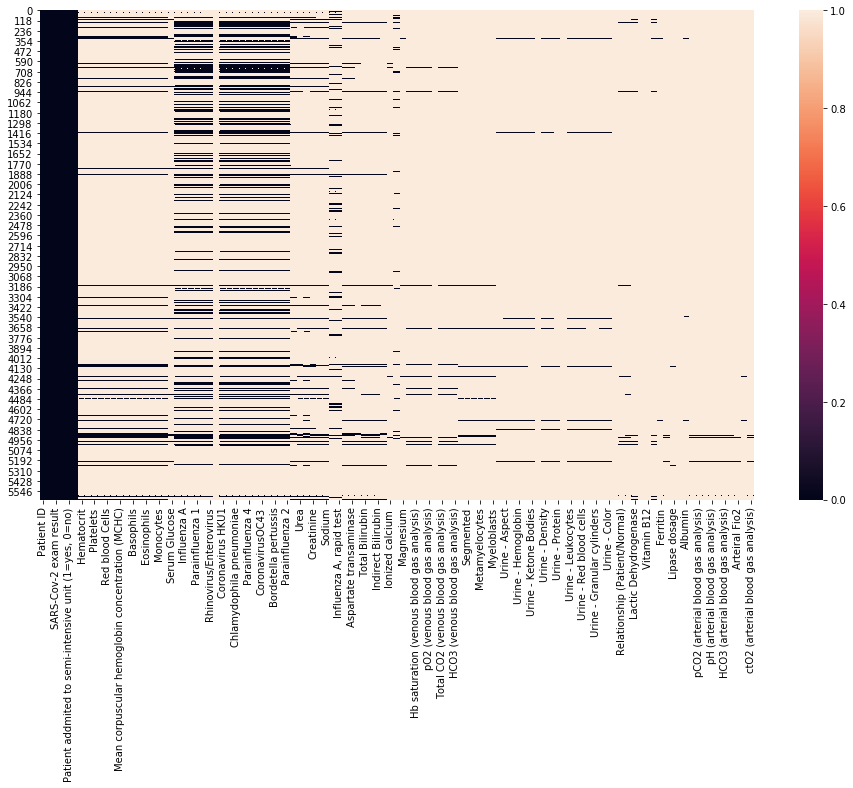

In [8]:
#lets check whether the null values are present in the dataset or not using heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df.isna())

## Exploring Data Variable

In [9]:
for i in df.columns:
    print(i)
    print('# of unique values -->', df[i].nunique())
    if df[i].nunique()<15:
        print(df[i].unique())
    else:
        print(df[i].describe())
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

Patient ID
# of unique values --> 5644
count                5644
unique               5644
top       35e49181913722d
freq                    1
Name: Patient ID, dtype: object
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Patient age quantile
# of unique values --> 20
count    5644.000000
mean        9.318391
std         5.777903
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        19.000000
Name: Patient age quantile, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
SARS-Cov-2 exam result
# of unique values --> 2
['negative' 'positive']
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Patient addmited to regular ward (1=yes, 0=no)
# of unique values --> 2
[0 1]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Patient addmited to semi-intensive unit (1=yes, 0=no)
# of unique values --> 2
[0 1]
++++++++++++++++++++++++++++++++++++++++++++++++

count    1.530000e+02
mean    -1.479159e-09
std      1.003284e+00
min     -4.766074e-01
25%     -3.755311e-01
50%     -2.856855e-01
75%     -6.107152e-02
max      8.507952e+00
Name: Gamma-glutamyltransferase , dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Total Bilirubin
# of unique values --> 19
count    1.820000e+02
mean    -2.783733e-09
std      1.002759e+00
min     -1.093174e+00
25%     -7.870851e-01
50%     -1.749078e-01
75%      1.311808e-01
max      5.028599e+00
Name: Total Bilirubin, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Direct Bilirubin
# of unique values --> 10
[            nan  5.80053806e-01 -3.20472056e-03 -1.16972160e+00
 -5.86463153e-01  3.49634576e+00  1.16331220e+00  1.74657059e+00
  6.99589634e+00  4.66286278e+00  5.82938004e+00]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Indirect Bilirubin
# of unique values --> 10
[        nan -0.27865431  1.69086373 -

In [10]:
print('>>>> # of unique values in df <<<<')
for i in df:
    print(i, '--->', df[i].nunique())

>>>> # of unique values in df <<<<
Patient ID ---> 5644
Patient age quantile ---> 20
SARS-Cov-2 exam result ---> 2
Patient addmited to regular ward (1=yes, 0=no) ---> 2
Patient addmited to semi-intensive unit (1=yes, 0=no) ---> 2
Patient addmited to intensive care unit (1=yes, 0=no) ---> 2
Hematocrit ---> 176
Hemoglobin ---> 84
Platelets ---> 249
Mean platelet volume  ---> 48
Red blood Cells ---> 211
Lymphocytes ---> 318
Mean corpuscular hemoglobin concentration (MCHC) ---> 57
Leukocytes ---> 475
Basophils ---> 17
Mean corpuscular hemoglobin (MCH) ---> 91
Eosinophils ---> 86
Mean corpuscular volume (MCV) ---> 190
Monocytes ---> 146
Red blood cell distribution width (RDW) ---> 61
Serum Glucose ---> 71
Respiratory Syncytial Virus ---> 2
Influenza A ---> 2
Influenza B ---> 2
Parainfluenza 1 ---> 2
CoronavirusNL63 ---> 2
Rhinovirus/Enterovirus ---> 2
Mycoplasma pneumoniae ---> 0
Coronavirus HKU1 ---> 2
Parainfluenza 3 ---> 2
Chlamydophila pneumoniae ---> 2
Adenovirus ---> 2
Parainfluenza 4

In [11]:
#Drop those columns which conatin nun unique value
df.drop(columns=['Mycoplasma pneumoniae', 'Urine - Sugar', 'Prothrombin time (PT), Activity', 'D-Dimer', 'Patient ID'], axis=1, inplace=True)

## Check Missing value

In [12]:
df.isnull().sum()

Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 106, dtype: int64

In [13]:
df.isna().sum()

Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 106, dtype: int64

In [14]:
#Lets find out columns which null value more than 5000.
cols = []
print(df.shape[0])
for i in df:
    if df[i].isna().sum() > 5000:
        print(i, '>>>', df[i].isna().sum())
        cols.append(i)
    else: continue
print(len(cols))

5644
Hematocrit >>> 5041
Hemoglobin >>> 5041
Platelets >>> 5042
Mean platelet volume  >>> 5045
Red blood Cells >>> 5042
Lymphocytes >>> 5042
Mean corpuscular hemoglobin concentration (MCHC) >>> 5042
Leukocytes >>> 5042
Basophils >>> 5042
Mean corpuscular hemoglobin (MCH) >>> 5042
Eosinophils >>> 5042
Mean corpuscular volume (MCV) >>> 5042
Monocytes >>> 5043
Red blood cell distribution width (RDW) >>> 5042
Serum Glucose >>> 5436
Neutrophils >>> 5131
Urea >>> 5247
Proteina C reativa mg/dL >>> 5138
Creatinine >>> 5220
Potassium >>> 5273
Sodium >>> 5274
Alanine transaminase >>> 5419
Aspartate transaminase >>> 5418
Gamma-glutamyltransferase  >>> 5491
Total Bilirubin >>> 5462
Direct Bilirubin >>> 5462
Indirect Bilirubin >>> 5462
Alkaline phosphatase >>> 5500
Ionized calcium  >>> 5594
Strepto A >>> 5312
Magnesium >>> 5604
pCO2 (venous blood gas analysis) >>> 5508
Hb saturation (venous blood gas analysis) >>> 5508
Base excess (venous blood gas analysis) >>> 5508
pO2 (venous blood gas analysis)

Finding:- Total 82 columns findout with null value more than 5000.
    

In [15]:
#Lets drop all columns more than 5000 null value
df.drop(columns=cols, axis=1, inplace=True)

In [16]:
#after dropning columns null value>5000 check null value
df.isnull().sum()

Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
Respiratory Syncytial Virus                              4290
Influenza A                                              4290
Influenza B                                              4290
Parainfluenza 1                                          4292
CoronavirusNL63                                          4292
Rhinovirus/Enterovirus                                   4292
Coronavirus HKU1                                         4292
Parainfluenza 3                                          4292
Chlamydophila pneumoniae                                 4292
Adenovirus                                               4292
Parainfluenza 4                                          4292
Coronavi

In [17]:
#Sepreate the categorical columns and numerical columns
cat_df, num_df = [], []
for i in df:
    if df[i].dtype=='O':
        cat_df.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_df.append(i)
    else: print('Others >', i)
print('>>> Total Number of Features ::', df.shape[1])
print('>>> Number of Categorical Features ::', len(cat_df))
print('>>> Number of Numerical Features ::', len(num_df))

>>> Total Number of Features :: 24
>>> Number of Categorical Features :: 20
>>> Number of Numerical Features :: 4


In [18]:
#For numerical features fill null value with mean
for i in num_df:
    if df[i].isna().sum() > 3:
        print(i, '>>>', df[i].isna().sum())
        a = df[i].mean()
        df[i].fillna(a, inplace=True)
    else: continue

In [19]:
#After fill numerical features null value 
df.isnull().sum()

Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
Respiratory Syncytial Virus                              4290
Influenza A                                              4290
Influenza B                                              4290
Parainfluenza 1                                          4292
CoronavirusNL63                                          4292
Rhinovirus/Enterovirus                                   4292
Coronavirus HKU1                                         4292
Parainfluenza 3                                          4292
Chlamydophila pneumoniae                                 4292
Adenovirus                                               4292
Parainfluenza 4                                          4292
Coronavi

In [20]:
#Lets remaing null value fillup with unknown
df.fillna('Unknown', inplace=True)

In [21]:
#After fillup null value check info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 24 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Patient age quantile                                   5644 non-null   int64 
 1   SARS-Cov-2 exam result                                 5644 non-null   object
 2   Patient addmited to regular ward (1=yes, 0=no)         5644 non-null   int64 
 3   Patient addmited to semi-intensive unit (1=yes, 0=no)  5644 non-null   int64 
 4   Patient addmited to intensive care unit (1=yes, 0=no)  5644 non-null   int64 
 5   Respiratory Syncytial Virus                            5644 non-null   object
 6   Influenza A                                            5644 non-null   object
 7   Influenza B                                            5644 non-null   object
 8   Parainfluenza 1                                        564

Reamark:
    1. After treat null value 5644 row with 24 features renaining.
    2. features are int type and others are object type.
    

In [22]:
for i in df.columns:
    print(i)
    print('# of unique values -->', df[i].nunique())
    if df[i].nunique()<15:
        print(df[i].unique())
    else:
        print(df[i].describe())
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

Patient age quantile
# of unique values --> 20
count    5644.000000
mean        9.318391
std         5.777903
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        19.000000
Name: Patient age quantile, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
SARS-Cov-2 exam result
# of unique values --> 2
['negative' 'positive']
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Patient addmited to regular ward (1=yes, 0=no)
# of unique values --> 2
[0 1]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Patient addmited to semi-intensive unit (1=yes, 0=no)
# of unique values --> 2
[0 1]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Patient addmited to intensive care unit (1=yes, 0=no)
# of unique values --> 2
[0 1]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Respiratory Syncytial Virus
# of unique values --> 3
['Unknown' 'no

In [23]:
#Lets check each variables number of unique value only
print('>>>> # of unique values in df <<<<')
for i in df:
    print(i, '--->', df[i].nunique())

>>>> # of unique values in df <<<<
Patient age quantile ---> 20
SARS-Cov-2 exam result ---> 2
Patient addmited to regular ward (1=yes, 0=no) ---> 2
Patient addmited to semi-intensive unit (1=yes, 0=no) ---> 2
Patient addmited to intensive care unit (1=yes, 0=no) ---> 2
Respiratory Syncytial Virus ---> 3
Influenza A ---> 3
Influenza B ---> 3
Parainfluenza 1 ---> 3
CoronavirusNL63 ---> 3
Rhinovirus/Enterovirus ---> 3
Coronavirus HKU1 ---> 3
Parainfluenza 3 ---> 3
Chlamydophila pneumoniae ---> 3
Adenovirus ---> 3
Parainfluenza 4 ---> 3
Coronavirus229E ---> 3
CoronavirusOC43 ---> 3
Inf A H1N1 2009 ---> 3
Bordetella pertussis ---> 3
Metapneumovirus ---> 3
Parainfluenza 2 ---> 2
Influenza B, rapid test ---> 3
Influenza A, rapid test ---> 3


In [24]:
#Lets output fetures coverteed negative for 0 and for positive for 1
df['SARS-Cov-2 exam result'].replace({'negative':0, 'positive':1}, inplace=True)

In [25]:
df.dtypes

Patient age quantile                                      int64
SARS-Cov-2 exam result                                    int64
Patient addmited to regular ward (1=yes, 0=no)            int64
Patient addmited to semi-intensive unit (1=yes, 0=no)     int64
Patient addmited to intensive care unit (1=yes, 0=no)     int64
Respiratory Syncytial Virus                              object
Influenza A                                              object
Influenza B                                              object
Parainfluenza 1                                          object
CoronavirusNL63                                          object
Rhinovirus/Enterovirus                                   object
Coronavirus HKU1                                         object
Parainfluenza 3                                          object
Chlamydophila pneumoniae                                 object
Adenovirus                                               object
Parainfluenza 4                         

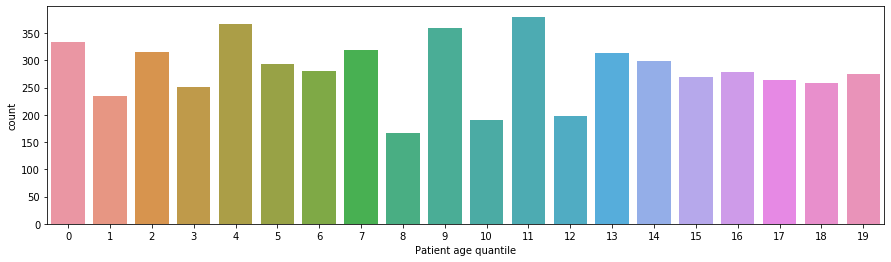

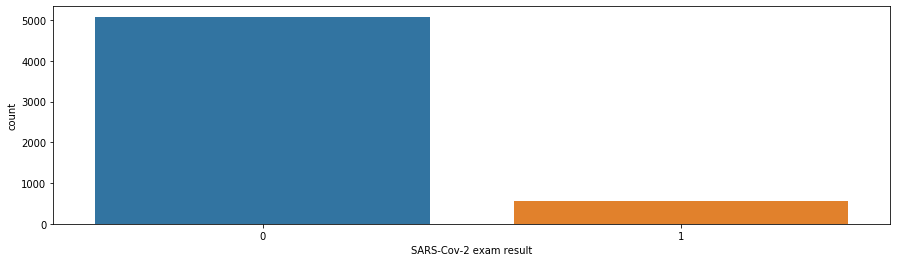

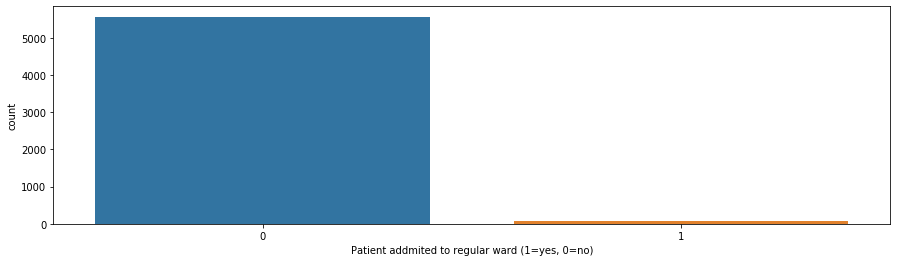

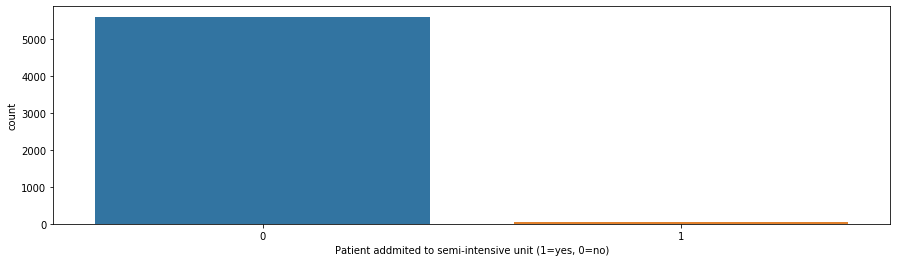

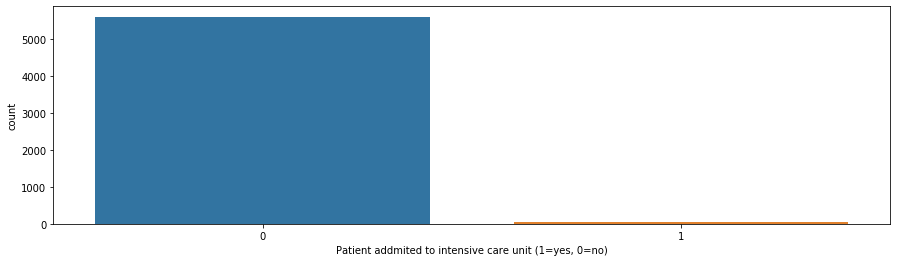

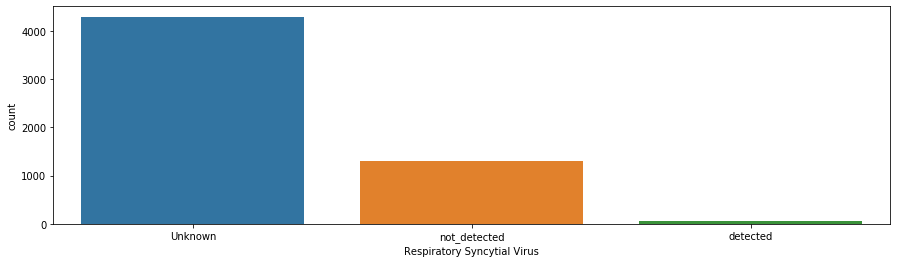

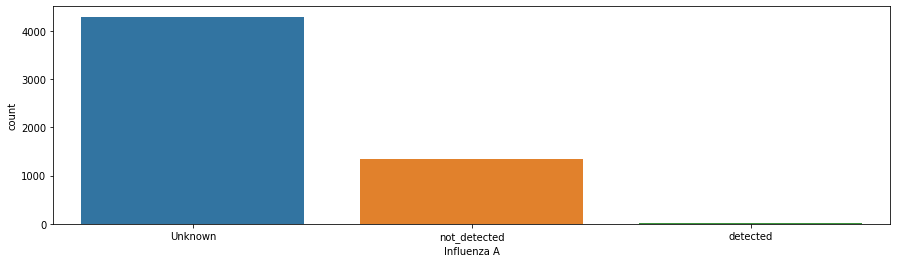

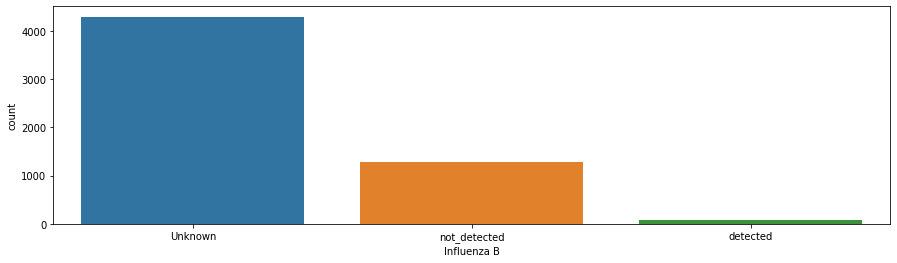

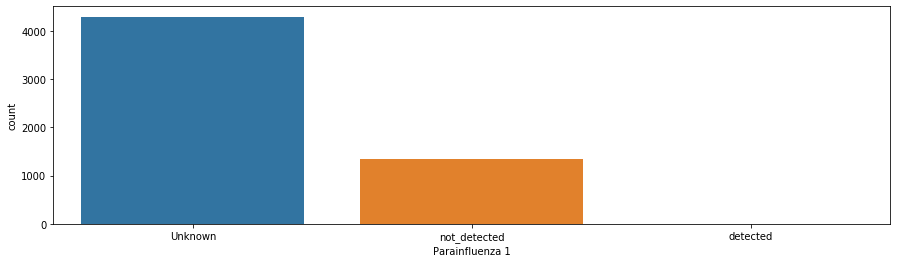

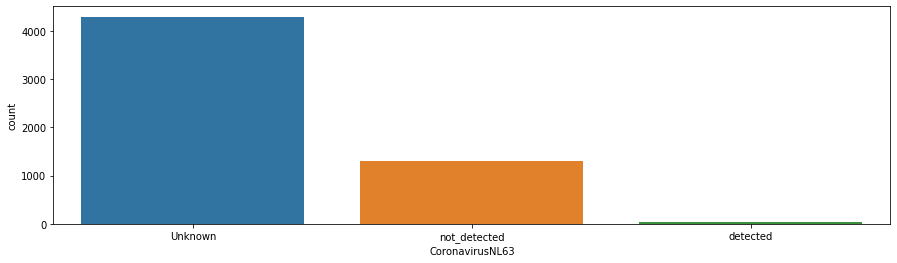

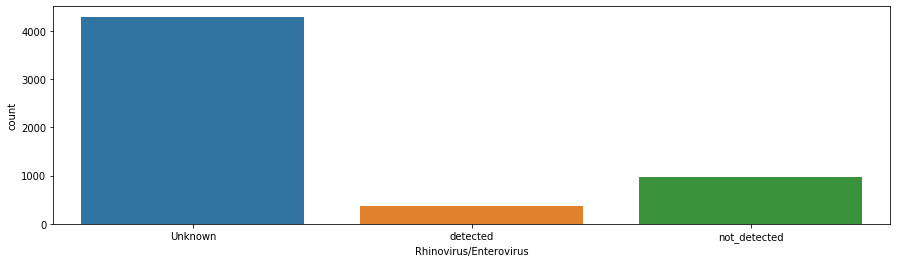

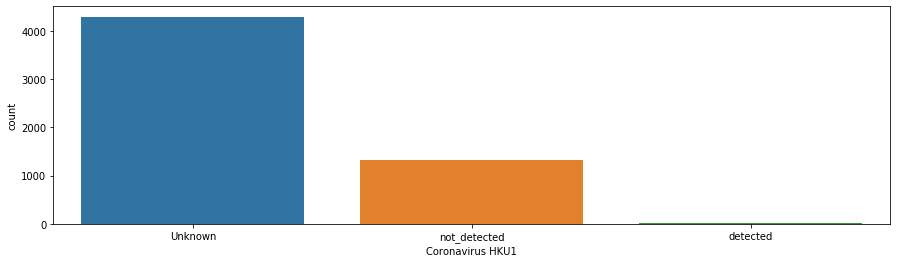

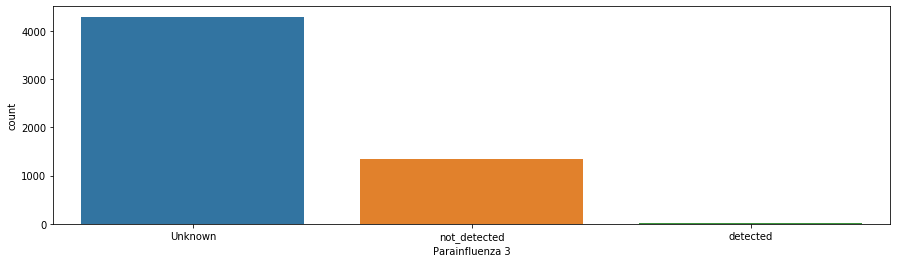

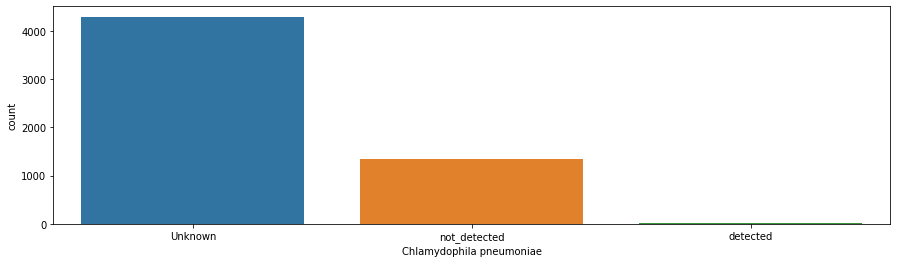

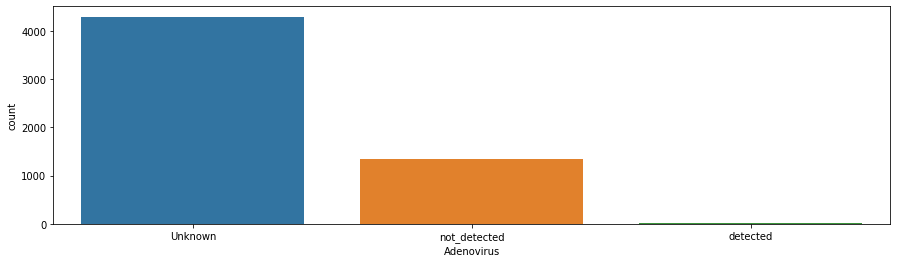

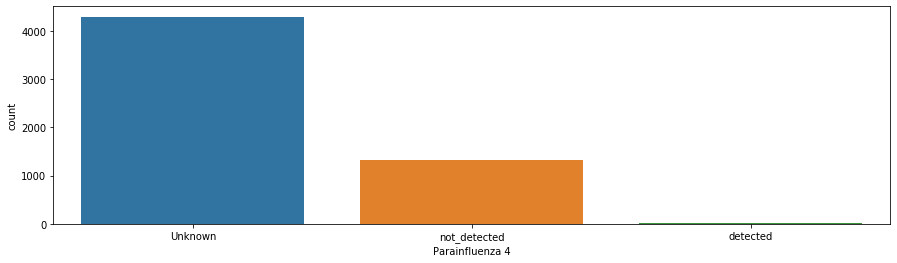

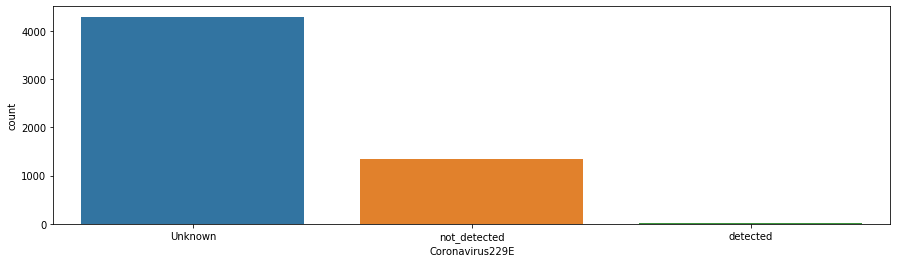

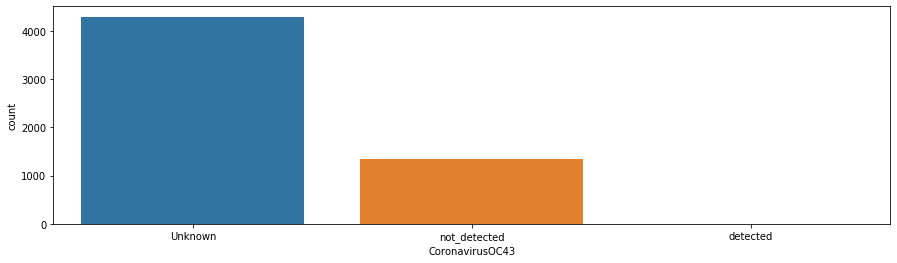

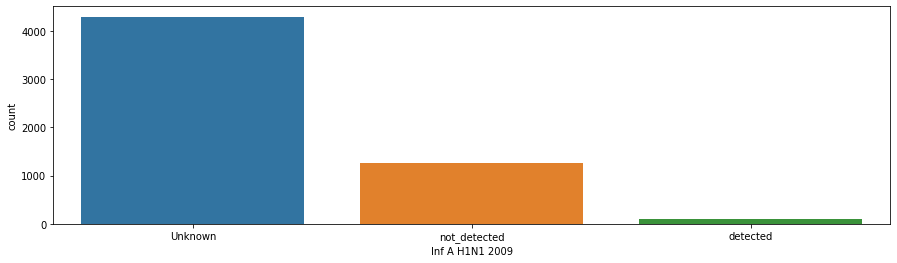

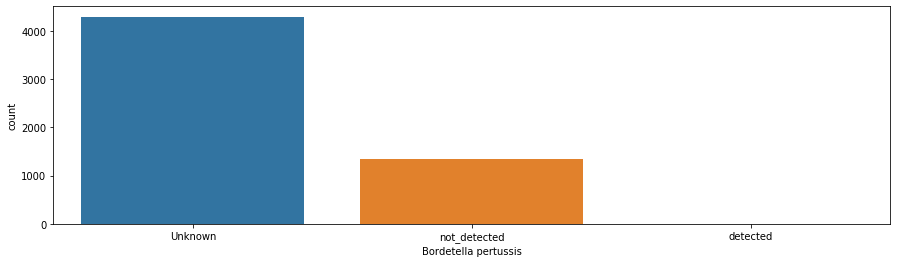

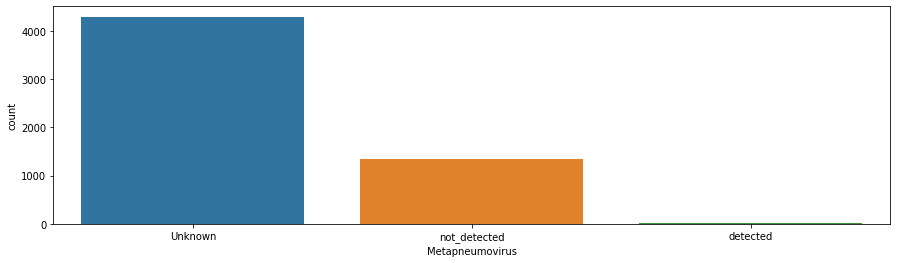

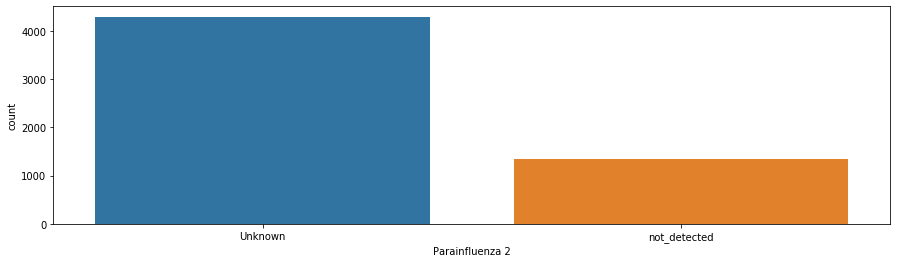

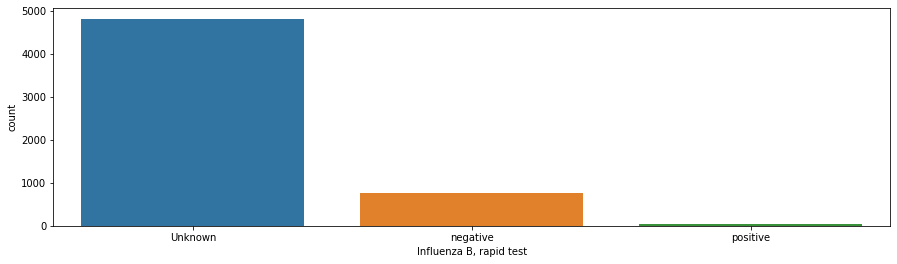

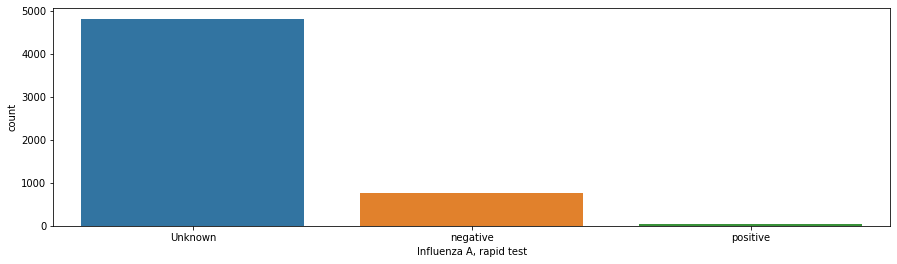

In [26]:
for i in df:
    plt.figure(figsize=(15,4))
    sns.countplot(x=i, data=df)

## Preprocessing of the Data

In [27]:
# Transform Non numeric columns into Numeric columns

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

In [28]:
df.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17,0,0,0,0,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,1
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15,0,0,0,0,2,2,2,2,2,...,2,2,2,2,2,2,2,1,0,0


In [29]:
#Splitting the data into input and output variable.
x=df.drop(columns=['SARS-Cov-2 exam result'],axis=1)
x.head()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17,0,0,0,2,2,2,2,2,1,...,2,2,2,2,2,2,2,1,1,1
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15,0,0,0,2,2,2,2,2,1,...,2,2,2,2,2,2,2,1,0,0


In [30]:
y = df['SARS-Cov-2 exam result']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: SARS-Cov-2 exam result, dtype: int64

In [31]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(5644, 23) 		 (5644,)


In [32]:
#Scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

## Machine Learning Algorithm

In [33]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [34]:
print(x_train.shape,x_test.shape)

(4515, 23) (1129, 23)


In [35]:
print(y_train.shape,y_test.shape)

(4515,) (1129,)


In [36]:
#Import all classification model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [37]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score

In [38]:
#All model initialize with default parameters not using GridsearchCv for best parameters
#Because Dataset very huge so take much time for best parameters for each particular model

LR=LogisticRegression()
GNB=GaussianNB()
KNN=KNeighborsClassifier()
SVC=SVC()
DTC=DecisionTreeClassifier()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ETC=ExtraTreesClassifier()
ABC=AdaBoostClassifier()
BC=BaggingClassifier()


In [39]:
models=[]
models.append(('LogisticRegression',LR))
models.append(('GaussianNB',GNB))
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SVC))

models.append(('DecisionTreeClassifier',DTC))

models.append(('RandomForestClassifier',RFC))
models.append(('GradientBoostingClassifier',GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))
models.append(('BaggingClassifier',BC))

In [40]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

************ LogisticRegression **********


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score= 0.9016829052258636


Cross_Val_Score= 0.9009565053662211


roc_auc_score= 0.5163822166034556


classification_report
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1017
           1       0.57      0.04      0.07       112

    accuracy                           0.90      1129
   macro avg       0.74      0.52      0.51      1129
weighted avg       0.87      0.90      0.86      1129



[[1014    3]
 [ 108    4]]





************ GaussianNB **********


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy_score= 0.8768821966341895


Cross_Val_S

Cross_Val_Score= 0.8984754911190611


roc_auc_score= 0.5203943671864025


classification_report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      1017
           1       0.32      0.05      0.09       112

    accuracy                           0.89      1129
   macro avg       0.61      0.52      0.52      1129
weighted avg       0.85      0.89      0.86      1129



[[1004   13]
 [ 106    6]]







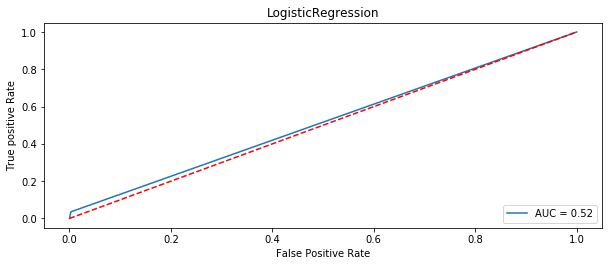

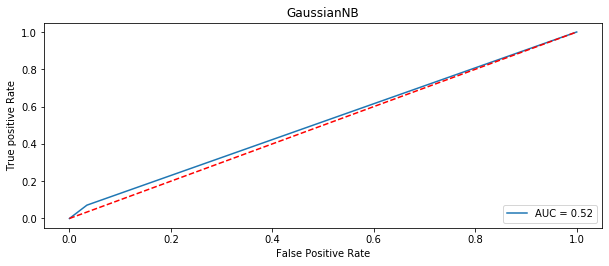

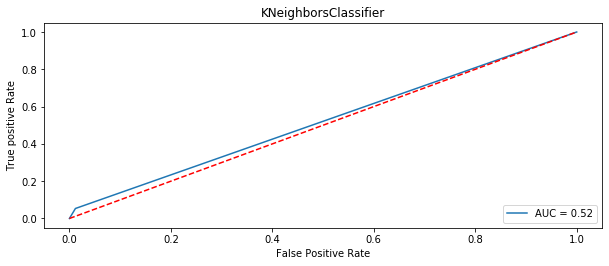

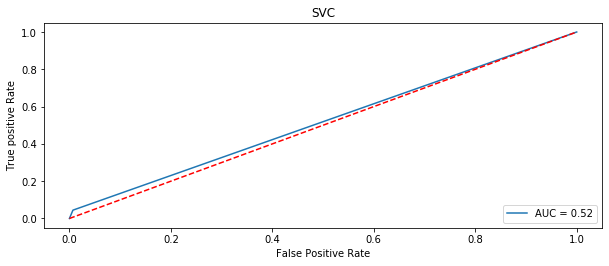

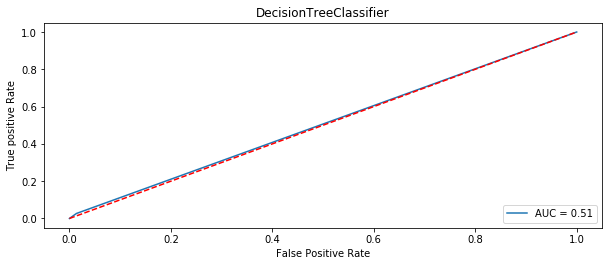

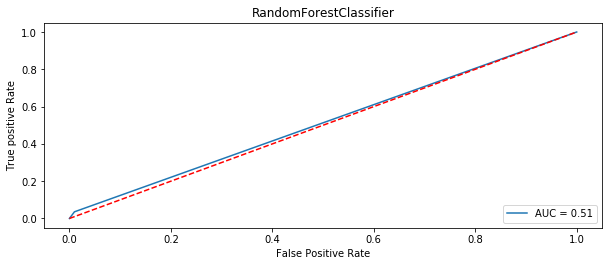

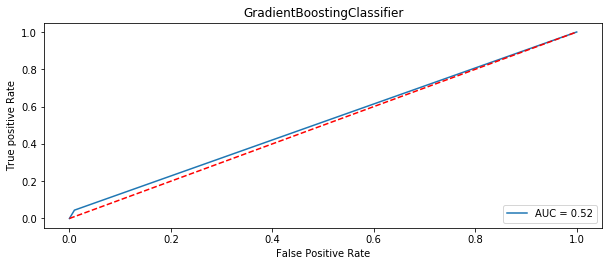

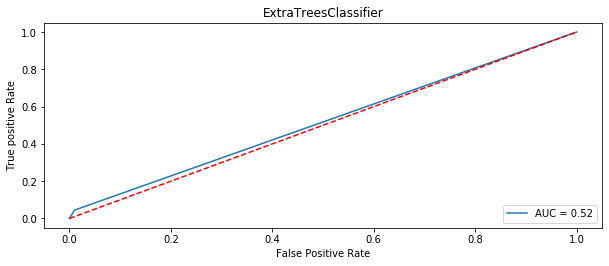

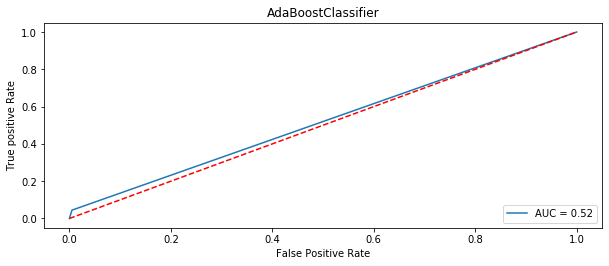

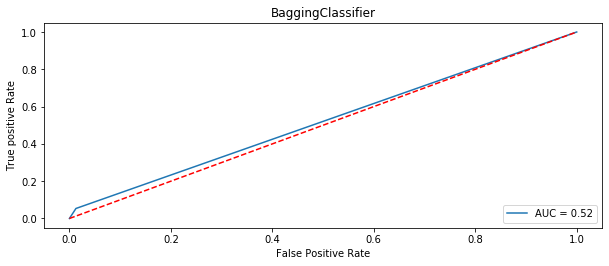

In [41]:
Model=[]
score=[]
CVS=[]
rocscore=[]
for name,model in models:
    print('************',name,'**********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    CVS.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [42]:
result = pd.DataFrame({'Model':Model,'Accuracy_score': score,'cross_val_score':CVS,'Roc_auc_curve':rocscore}).sort_values(by='Accuracy_score',ascending=False)
result

,Model,Accuracy_score,cross_val_score,Roc_auc_curve
0,LogisticRegression,90.168291,90.095651,51.638222
8,AdaBoostClassifier,90.079717,90.166416,51.986322
3,SVC,89.902569,90.007092,51.887993
6,GradientBoostingClassifier,89.636847,90.166541,51.740501
7,ExtraTreesClassifier,89.636847,90.131080,51.740501
2,KNeighborsClassifier,89.548273,90.007029,52.088601
5,RandomForestClassifier,89.548273,90.042490,51.294072
9,BaggingClassifier,89.459699,89.847549,52.039437
4,DecisionTreeClassifier,89.105403,89.847643,50.650987
1,GaussianNB,87.688220,88.890542,51.850681


In [43]:
#save best model

import joblib
from joblib import dump #from joblib import load > to load .pkl file
joblib.dump(ABC,'ABC_Covid19_Clinical_Dataset.pkl')

['ABC_Covid19_Clinical_Dataset.pkl']